# Model Training and Testing

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm






### Loading Dataset

In [5]:
df = pd.read_csv('booking_after_encoding.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36280 entries, 0 to 36279
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36280 non-null  object 
 1   number_of_adults          36280 non-null  int64  
 2   number_of_children        36280 non-null  int64  
 3   number_of_weekend_nights  36280 non-null  int64  
 4   number_of_week_nights     36280 non-null  int64  
 5   type_of_meal              36280 non-null  int64  
 6   car_parking_space         36280 non-null  int64  
 7   room_type                 36280 non-null  int64  
 8   lead_time                 36280 non-null  int64  
 9   market_segment_type       36280 non-null  int64  
 10  repeated                  36280 non-null  int64  
 11  P_C                       36280 non-null  int64  
 12  P_not_C                   36280 non-null  int64  
 13  average_price             36280 non-null  float64
 14  specia

In [12]:
df.columns

Index(['Booking_ID', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'reservation_day',
       'reservation_month', 'reservation_year', 'date_of_arrival',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'],
      dtype='object')

### Normalization

In [14]:
 
scaler = StandardScaler()
 
scaler.fit(df.drop(['Booking_ID','date_of_reservation','date_of_arrival','booking_status'], axis=1))
scaled_features = scaler.transform(df.drop(['Booking_ID','date_of_reservation','date_of_arrival','booking_status'],axis=1))
df_normalized= pd.DataFrame(scaled_features,columns=['number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests',
         'reservation_day',
       'reservation_month', 'reservation_year',
       'arrival_day', 'arrival_month', 'arrival_year', 'lead_month',
       'number_of_total_nights', 'number_of_total_people'])
df_normalized.head()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,...,special_requests,reservation_day,reservation_month,reservation_year,arrival_day,arrival_month,arrival_year,lead_month,number_of_total_nights,number_of_total_people
0,-1.628897,-0.265476,0.223564,0.593587,2.369986,-0.178807,-0.506409,-0.933825,0.656666,-0.162198,...,0.483622,-1.098253,1.165126,0.467891,-0.549184,1.151091,-0.174807,-0.860065,0.585082,-1.471726
1,0.298955,2.274468,0.223564,0.593587,-0.492015,-0.178807,-0.506409,-0.980397,0.656666,-0.162198,...,-0.788182,1.420551,-1.766679,0.467891,-1.681093,-1.048160,-0.174807,-0.860065,0.585082,1.628443
2,-1.628897,-0.265476,-0.937124,-0.141558,-0.492015,-0.178807,-0.506409,1.464640,0.656666,-0.162198,...,0.483622,0.504622,-0.789411,-2.137249,0.129960,1.425997,-1.860166,1.620539,-0.585018,-1.471726
3,-1.628897,-0.265476,0.223564,-0.141558,2.369986,-0.178807,-0.506409,-0.433175,0.656666,-0.162198,...,-0.788182,-0.525797,-1.115167,0.467891,1.488250,-0.498347,-0.174807,-0.505693,0.000032,-1.471726
4,-1.628897,2.274468,0.223564,1.328731,-0.492015,-0.178807,-0.506409,-0.596177,0.656666,-0.162198,...,0.483622,-0.067833,0.839370,-2.137249,0.243151,1.151091,-1.860166,-0.505693,1.170132,0.078359


### Feauture Selection

In [16]:
df_feautures =df_normalized[['number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'P_C', 'P_not_C', 'average_price', 'special_requests']]

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split( df_feautures, df['booking_status'], test_size=0.2, random_state=10)

In [48]:
def train_model_and_predict(model,X_train,y_train,X_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

def evaluate_model(model,X_test,y_test, y_pred, display_labels=['Canceled','Not Canceled']):
    titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(
            model,
            X_test,
            y_test,
            display_labels=display_labels,
            cmap=plt.cm.Greens,
            normalize=normalize,
        )
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(y_test,y_pred,labels=[0,1]))

## Logistic Regression

### Training the Model

In [28]:
logreg = LogisticRegression()
y_pred = train_model_and_predict(logreg,X_train,y_train,X_test)

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

### Evaluate the Model

Confusion matrix, without normalization
[[1435  999]
 [ 477 4345]]
Normalized confusion matrix
[[0.5895645  0.4104355 ]
 [0.09892161 0.90107839]]


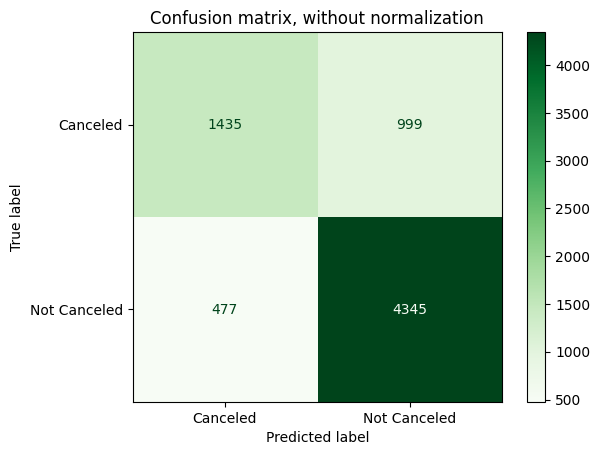

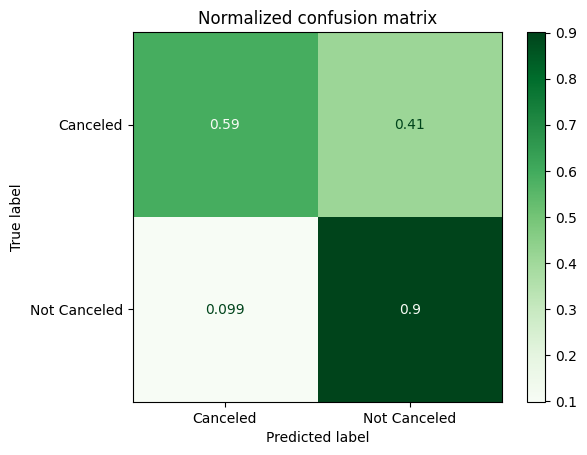

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      2434
           1       0.81      0.90      0.85      4822

    accuracy                           0.80      7256
   macro avg       0.78      0.75      0.76      7256
weighted avg       0.79      0.80      0.79      7256



In [49]:
evaluate_model(logreg,X_test,y_test, y_pred)

## KNN

### Training the Model

In [50]:
knn = KNeighborsClassifier(n_neighbors=7)
y_pred = train_model_and_predict(knn,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1746  688]
 [ 431 4391]]
Normalized confusion matrix
[[0.71733772 0.28266228]
 [0.089382   0.910618  ]]


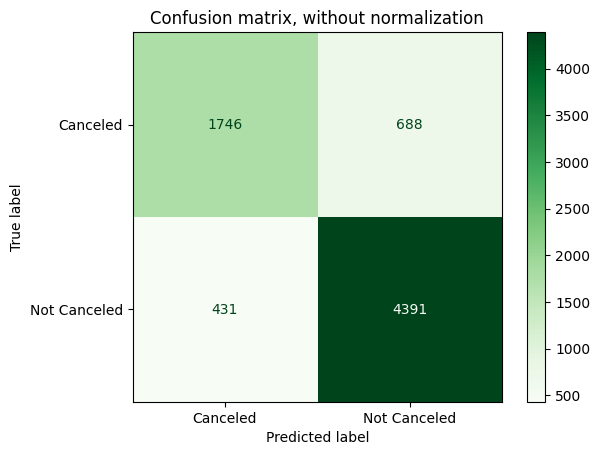

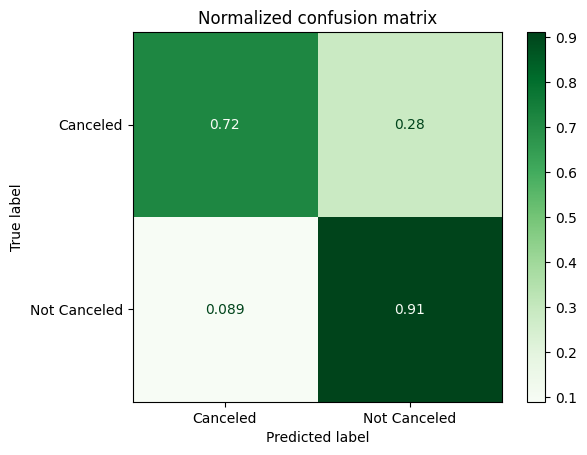

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      2434
           1       0.86      0.91      0.89      4822

    accuracy                           0.85      7256
   macro avg       0.83      0.81      0.82      7256
weighted avg       0.84      0.85      0.84      7256



In [51]:
evaluate_model(knn,X_test,y_test, y_pred)

## Decision Tree

### Training the Model

In [53]:
classifier = DecisionTreeClassifier()
y_pred = train_model_and_predict(classifier,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1900  534]
 [ 561 4261]]
Normalized confusion matrix
[[0.78060805 0.21939195]
 [0.11634177 0.88365823]]


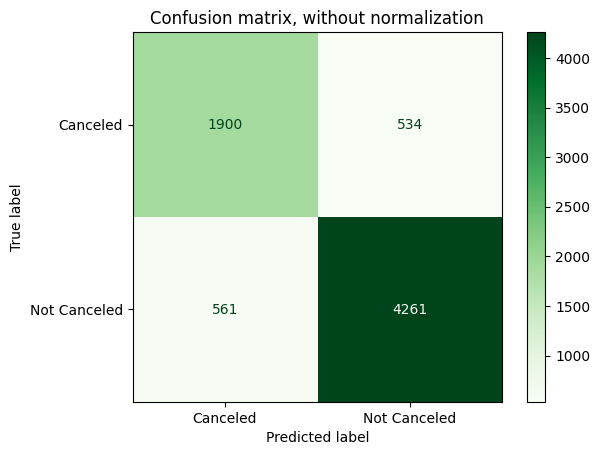

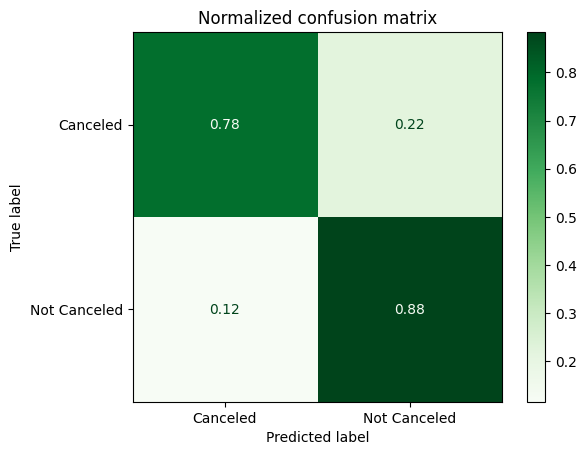

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      2434
           1       0.89      0.88      0.89      4822

    accuracy                           0.85      7256
   macro avg       0.83      0.83      0.83      7256
weighted avg       0.85      0.85      0.85      7256



In [54]:
evaluate_model(classifier,X_test,y_test, y_pred)


## SVM

### Training the Model

In [57]:
model = svm.SVC(kernel='rbf')
y_pred = train_model_and_predict(model,X_train,y_train,X_test)

### Evaluate the Model

Confusion matrix, without normalization
[[1502  932]
 [ 349 4473]]
Normalized confusion matrix
[[0.61709121 0.38290879]
 [0.07237661 0.92762339]]


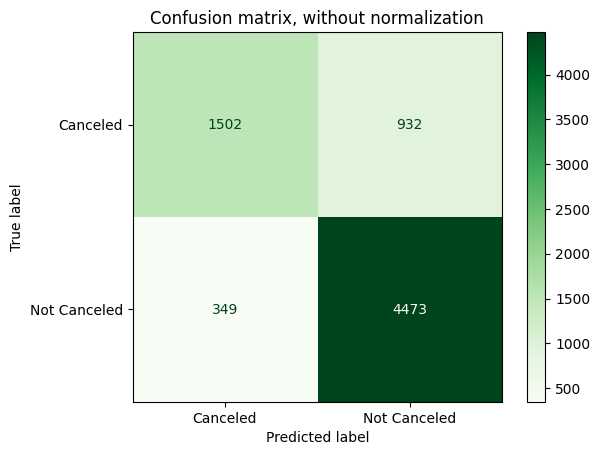

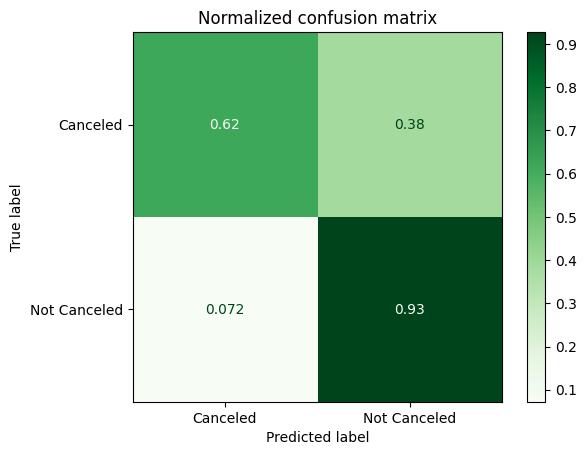

              precision    recall  f1-score   support

           0       0.81      0.62      0.70      2434
           1       0.83      0.93      0.87      4822

    accuracy                           0.82      7256
   macro avg       0.82      0.77      0.79      7256
weighted avg       0.82      0.82      0.82      7256



In [58]:
evaluate_model(model,X_test,y_test, y_pred)

# Compare Results